In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import cv2
import chess
import chess.svg

In [2]:
array_geral = np.load("Jogos/1/array_geral_1.npy")

In [3]:
def center_image(img, boolean = True, p = 0.35):
    if boolean == False:
        return img
    w, h = img.shape
    cw, ch = w//2, h//2
    #p = 0.4 #max 0.5
    return img[int(cw - w*p): int(cw + w*p), int(ch - h*p) : int(ch + h*p)]

def show_full_board(array_geral, jogada = 0, center = False, p = 0.35):
    fig, axs = plt.subplots(8, 8, figsize = (10, 10))
    [axi.set_axis_off() for axi in axs.ravel()]
    for i in range(8):
        for j in range(8):
            axs[i, j].imshow(center_image(array_geral[jogada][i, j], boolean = center, p = p))
    return

def square_color(i, j):
    return ("Black" if (i + j) % 2 else "White")

def test_f1(a, b, threshold = 5):
    a1 = np.sum(cv2.Canny(a, 0, 25))/(255)
    b1 = np.sum(cv2.Canny(b, 0, 25))/(255)
    return (a1 > threshold, b1 > threshold)

def detect_change(a, b, plot = False):
    img1 = center_image(a, p = 0.25)
    img2 = center_image(b, p = 0.25)
    
    if plot:
        fig, axs = plt.subplots(1, 2, figsize = (10, 10))
        axs[0].imshow(cv2.Canny(img1, 0, 25))
        axs[1].imshow(cv2.Canny(img2, 0, 25))

    return test_f1(img1, img2)

def check_diff(a, b):
    M, m = max(a, b), min(a, b)
    return (m/M)

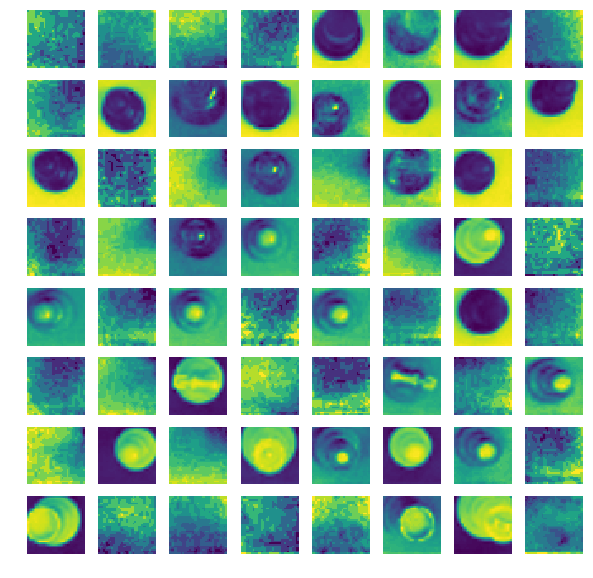

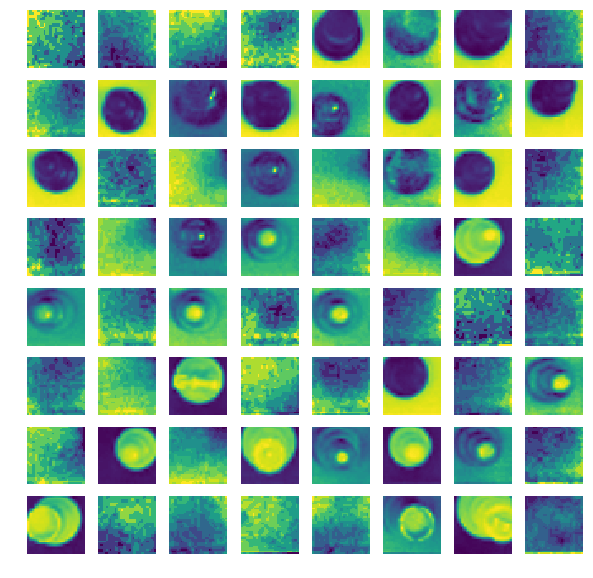

In [39]:
#show_full_board(array_geral, jogada = 1, center = True, p = 0.4)
show_full_board(array_geral, jogada = 23, center = True, p = 0.35)
show_full_board(array_geral, jogada = 24, center = True, p = 0.35)

In [5]:
##

In [6]:
square_color(0, 0)

'White'

In [7]:
img1 = array_geral[0][4, 3]
img2 = array_geral[1][4, 3]

detect_change(img1, img2)

(False, True)

(True, True)

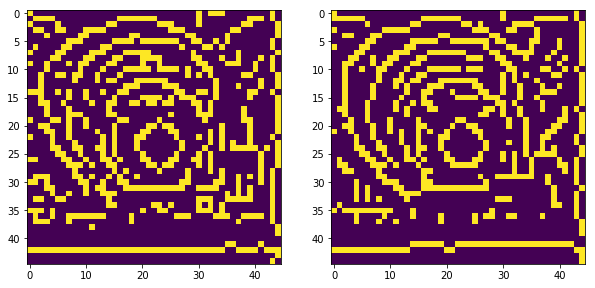

In [40]:
img1 = center_image(array_geral[23][6, 4], p = 0.45)
img2 = center_image(array_geral[24][6, 4], p = 0.45)

fig, axs = plt.subplots(1, 2, figsize = (10, 10))
axs[0].imshow(cv2.Canny(img1, 0, 5))
axs[1].imshow(cv2.Canny(img2, 0, 5))

test_f1(img1, img2)

In [9]:
matrix = np.zeros((8, 8), dtype = np.object)
jogada = 23

for x in range(8):
    for y in range(8):
        #matrix[x, y] = np.sum(test_f1(array_geral[jogada][x, y], array_geral[jogada+1][x, y]))%2
        matrix[x, y] = np.sum(detect_change(array_geral[jogada][x, y], array_geral[jogada+1][x, y]))%2
matrix

array([[0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 1, 0],
       [0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0]], dtype=object)

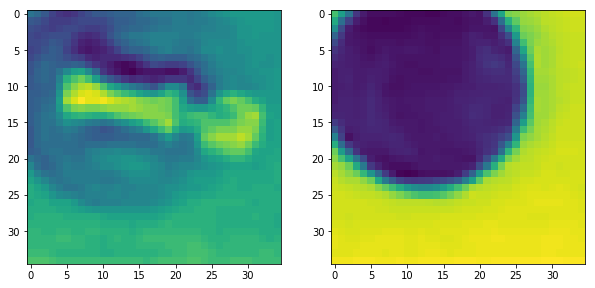

In [10]:
img1 = center_image(array_geral[23][5, 5], True)
img2 = center_image(array_geral[24][5, 5], True)

fig, axs = plt.subplots(1, 2, figsize = (10, 10))
axs[0].imshow(img1)
axs[1].imshow(img2)

In [11]:
np.std(img1)

8.979760517896185

In [12]:
np.std(img2)

54.38754512346034

In [13]:
def check_diff(a, b):
    M, m = max(a, b), min(a, b)
    return (m/M)

h1 = cv2.calcHist([img1],[0],None,[256],[0,256]).ravel()
h2 = cv2.calcHist([img2],[0],None,[256],[0,256]).ravel()

In [14]:
check_diff(np.std(h1), np.std(h2))

0.8523204

In [15]:
matrix = np.zeros((8, 8), dtype = np.uint8)
jogada = 12

for x in range(8):
    for y in range(8):
        img1 = center_image(array_geral[jogada][x, y], True)
        img2 = center_image(array_geral[jogada+1][x, y], True)
        detected = 1 if check_diff(np.std(img1), np.std(img2)) < 0.5 else 0
#         if detected == 1:
#             detected = np.sum(detect_change(array_geral[jogada][x, y], array_geral[jogada + 1][x, y]))%2
        matrix[x, y] = detected
#matrix

In [16]:
for pos in np.transpose(np.nonzero(matrix)):
    if detect_change(array_geral[jogada][pos[0], pos[1]], array_geral[jogada+1][pos[0], pos[1]]) == (False, False):
        matrix[pos[0], pos[1]] = 0

In [17]:
matrix[0][:5] = np.array([1, 0, 1, 1, 1])

In [18]:
matrix

array([[1, 0, 1, 1, 1, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 1, 1, 1, 1]], dtype=uint8)

In [19]:
def detect_move(array_geral, jogada):
    matrix = np.zeros((8, 8), dtype = np.uint)
    
    for x in range(8):
        for y in range(8):
            img1 = center_image(array_geral[jogada][x, y], True)
            img2 = center_image(array_geral[jogada+1][x, y], True)
            detected = 1 if check_diff(np.std(img1), np.std(img2)) < 0.5 else 0
#             if detected == 1:
#                 detected = np.sum(detect_change(array_geral[jogada][x, y], array_geral[jogada + 1][x, y])) % 2
            matrix[x, y] = detected
    
    #correct false positives
    for pos in np.transpose(np.nonzero(matrix)):
        if detect_change(array_geral[jogada][pos[0], pos[1]], array_geral[jogada+1][pos[0], pos[1]]) == (False, False):
            matrix[pos[0], pos[1]] = 0
    
    if np.sum(matrix) == 2:
        pass
    elif np.sum(matrix) == 4:
        roque_curto = np.array([1, 1, 1, 1])
        roque_longo = np.array([1, 0, 1, 1, 1])
        if np.array_equal(matrix[0][4:], roque_curto):
            #print("Roque curto Pretas!")
            matrix[0][4:] = np.array([1, 0, 1, 0])
        elif np.array_equal(matrix[7][4:], roque_curto):
            #print("Roque curto Brancas!")
            matrix[7][4:] = np.array([1, 0, 1, 0])
        elif np.array_equal(matrix[0][:5], roque_longo):
            #print("Roque longo Pretas!")
            matrix[0][:5] = np.array([0, 0, 1, 0, 1])
        elif np.array_equal(matrix[7][:5], roque_longo):
            #print("Roque longo Brancas!")
            matrix[7][:5] = np.array([0, 0, 1, 0, 1])
        else:
            print("ERRO na identificação da jogada (sum == 4): {}".format(jogada))
        #print("Roque na jogada: {}.".format(jogada))
        pass
    else:
        print("ERRO na identificação da jogada: {}.".format(jogada))
    
    #correct false positives
    for pos in np.transpose(np.nonzero(matrix)):
        if detect_change(array_geral[jogada][pos[0], pos[1]], array_geral[jogada+1][pos[0], pos[1]]) == (False, True):
            matrix[pos[0], pos[1]] = 2
        elif detect_change(array_geral[jogada][pos[0], pos[1]], array_geral[jogada+1][pos[0], pos[1]]) == (True, True):
            matrix[pos[0], pos[1]] = 2
    return matrix

In [20]:
detect_move(array_geral, 23)

array([[0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 1, 0],
       [0, 0, 0, 0, 0, 2, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0]], dtype=uint64)

(False, True)

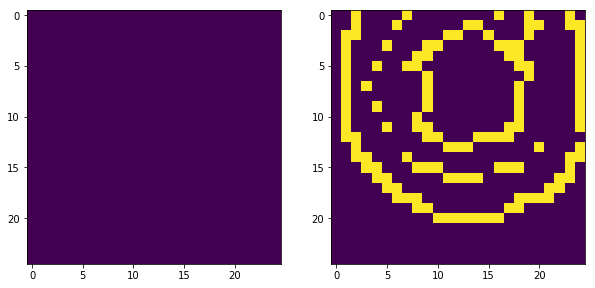

In [21]:
detect_change(array_geral[0][4, 3], array_geral[0 + 1][4, 3], plot = True)

In [22]:
%%time 

for i in range(len(array_geral)-1):
    detect_move(array_geral, i)

CPU times: user 425 ms, sys: 182 ms, total: 607 ms
Wall time: 291 ms


In [23]:
##

In [24]:
def matrix_to_chess_notation(pos1, pos2):
#     pos1, pos2 = array
    l1, n1 = chr(97 + pos1[1]), 8 - pos1[0]
    l2, n2 = chr(97 + pos2[1]), 8 - pos2[0]
    return ("{}{}{}{}".format(l1, n1, l2, n2))

In [25]:
matrix_to_chess_notation(np.argwhere(detect_move(array_geral, 0) == 1).ravel(), np.argwhere(detect_move(array_geral, 0) == 2).ravel())

'd2d4'

In [26]:
%%time
jogadas = np.array([matrix_to_chess_notation(np.argwhere(detect_move(array_geral, i) == 1).ravel(), np.argwhere(detect_move(array_geral, i) == 2).ravel()) for i in range(len(array_geral)-1)])
print(jogadas)

['d2d4' 'g8f6' 'c2c4' 'g7g6' 'b1c3' 'f8g7' 'e2e4' 'd7d6' 'g1f3' 'e8g8'
 'f1e2' 'c7c5' 'e1g1' 'c8g4' 'd4d5' 'b8d7' 'c1g5' 'a7a6' 'a2a4' 'd8c7'
 'd1d2' 'a8e8' 'h2h3' 'g4f3' 'e2f3' 'e7e6' 'b2b3' 'g8h8' 'g5e3' 'f6g8'
 'f3e2' 'e6e5' 'g2g4' 'c7d8' 'g1g2' 'd8h4' 'f2f3' 'g7h6' 'g4g5' 'h6g7'
 'e3f2' 'h4f4' 'f2e3' 'f4h4' 'd2e1' 'h4e1' 'f1e1' 'h7h6']
CPU times: user 784 ms, sys: 204 ms, total: 988 ms
Wall time: 544 ms


In [27]:
%%time
jogadas = []
for i in range(len(array_geral)-1):
    matrix = detect_move(array_geral, i)
    prev = np.argwhere(matrix == 1).ravel()
    to = np.argwhere(matrix == 2).ravel()
    jogadas.append(matrix_to_chess_notation(prev, to))
array_de_jogadas = np.array(jogadas)
print(jogadas)

['d2d4', 'g8f6', 'c2c4', 'g7g6', 'b1c3', 'f8g7', 'e2e4', 'd7d6', 'g1f3', 'e8g8', 'f1e2', 'c7c5', 'e1g1', 'c8g4', 'd4d5', 'b8d7', 'c1g5', 'a7a6', 'a2a4', 'd8c7', 'd1d2', 'a8e8', 'h2h3', 'g4f3', 'e2f3', 'e7e6', 'b2b3', 'g8h8', 'g5e3', 'f6g8', 'f3e2', 'e6e5', 'g2g4', 'c7d8', 'g1g2', 'd8h4', 'f2f3', 'g7h6', 'g4g5', 'h6g7', 'e3f2', 'h4f4', 'f2e3', 'f4h4', 'd2e1', 'h4e1', 'f1e1', 'h7h6']
CPU times: user 402 ms, sys: 105 ms, total: 508 ms
Wall time: 285 ms


In [28]:
#np.save("Jogos/0/array_jogadas_0", array_de_jogadas)

In [29]:
##

In [30]:
def jogo_ate_i(array_de_jogadas, i = 9999):
    board = chess.Board()
    for jogada in array_de_jogadas[:i]:
        board.push_uci(jogada)
    return board

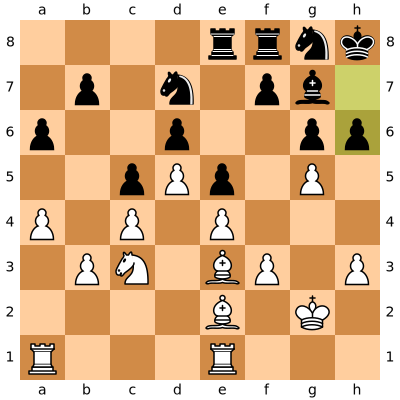

In [31]:
board = chess.Board()

jogo_ate_i(array_de_jogadas, i = 99)